In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

# Анализ данных

In [2]:
#Загружаем данные
data = pd.read_csv('./data/credit.csv')

In [3]:
#Целевая переменная
#data['default'].value_counts()

In [4]:
#отображаю количество набледений/атрибутов
data.shape

(1000, 21)

In [5]:
#Показать первые 5 строк набора данных
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_length     1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   personal_status       1000 non-null   object
 9   other_debtors         1000 non-null   object
 10  residence_history     1000 non-null   int64 
 11  property              1000 non-null   object
 12  age                   1000 non-null   int64 
 13  installment_plan      1000 non-null   object
 14  housing               1000 non-null   object
 15  existing_credits      1000 non-null   i

Набор данных содержит следующие признаки:
* баланс
* срок кредита(мес)
* кредитная история
* цель кредитования
* сумма
* сумма сбережений
* продолжительность занятости
* рассрочка
* семейное положение
* другие должники
* история проживания
* имущество
* возраст
* рассрочка
* недвижимость
* существующие кредиты
* дефолт(целевая переменная)
* иждивенцы
* телефон
* иностранный работник
* работа

In [7]:
# Показать 5 последних строк
data.tail()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
995,unknown,12,repaid,furniture,1736,< 100 DM,4 - 7 yrs,3,female,none,...,real estate,31,none,own,1,1,1,none,yes,unskilled resident
996,< 0 DM,30,repaid,car (used),3857,< 100 DM,1 - 4 yrs,4,divorced male,none,...,building society savings,40,none,own,1,1,1,yes,yes,mangement self-employed
997,unknown,12,repaid,radio/tv,804,< 100 DM,> 7 yrs,4,single male,none,...,other,38,none,own,1,1,1,none,yes,skilled employee
998,< 0 DM,45,repaid,radio/tv,1845,< 100 DM,1 - 4 yrs,4,single male,none,...,unknown/none,23,none,for free,1,2,1,yes,yes,skilled employee
999,1 - 200 DM,45,critical,car (used),4576,101 - 500 DM,unemployed,3,single male,none,...,other,27,none,own,1,1,1,none,yes,skilled employee


In [8]:
#Выводим статистику по количественным признакам
data.describe()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.300000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [9]:
#анализируем типы данных в разрезе признаков
data.dtypes.value_counts()

object    13
int64      8
dtype: int64

In [10]:
#создаем отдельные списки со значениями категориальных и количественных признаков
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_length', 'personal_status', 'other_debtors', 'property', 'installment_plan', 'housing', 'telephone', 'foreign_worker', 'job']
['months_loan_duration', 'amount', 'installment_rate', 'residence_history', 'age', 'existing_credits', 'default', 'dependents']


In [11]:
#вывожу статистику по категориальным признакам
data[categorical_columns].describe()

,checking_balance,credit_history,purpose,savings_balance,employment_length,personal_status,other_debtors,property,installment_plan,housing,telephone,foreign_worker,job
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,2,2,4
top,unknown,repaid,radio/tv,< 100 DM,1 - 4 yrs,single male,none,other,none,own,none,yes,skilled employee
freq,394,530,280,603,339,548,907,332,814,713,596,963,630


In [12]:
#Получаем значения категориальных признаков
for c in categorical_columns:
    print (data[c].unique())

['< 0 DM' '1 - 200 DM' 'unknown' '> 200 DM']
['critical' 'repaid' 'delayed' 'fully repaid' 'fully repaid this bank']
['radio/tv' 'education' 'furniture' 'car (new)' 'car (used)' 'business'
 'domestic appliances' 'repairs' 'others' 'retraining']
['unknown' '< 100 DM' '501 - 1000 DM' '> 1000 DM' '101 - 500 DM']
['> 7 yrs' '1 - 4 yrs' '4 - 7 yrs' 'unemployed' '0 - 1 yrs']
['single male' 'female' 'divorced male' 'married male']
['none' 'guarantor' 'co-applicant']
['real estate' 'building society savings' 'unknown/none' 'other']
['none' 'bank' 'stores']
['own' 'for free' 'rent']
['yes' 'none']
['yes' 'no']
['skilled employee' 'unskilled resident' 'mangement self-employed'
 'unemployed non-resident']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3872fc1438>,
      dtype=object)

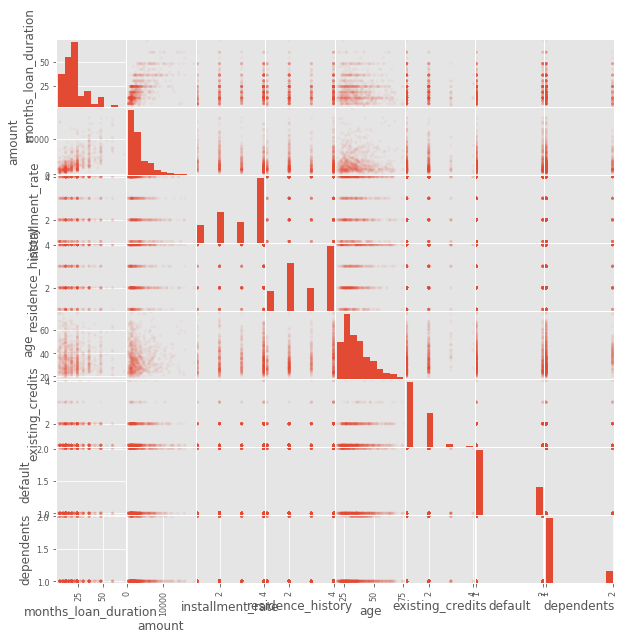

In [13]:
#отоборажаем гистограмму рассеивания
pd.plotting.scatter_matrix(data, alpha=0.05, figsize=(10, 10))

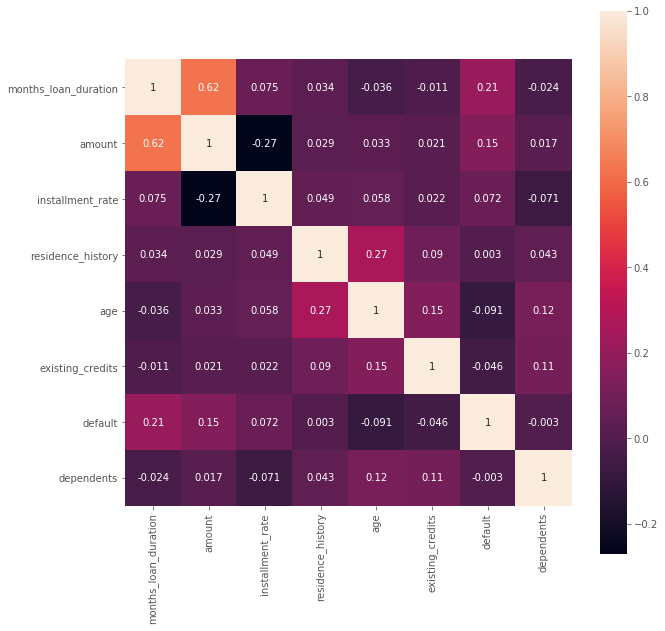

In [14]:
#строим матрицу корреляции
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), square=True, annot=True)
plt.show()

Самая большая корреляция между суммой и сроком кредита, в остальном данные мало коррелируют

# Подготовка данных

In [15]:
# Проверяем количество пропусков
#data.count(axis=0)
pd.isnull(data).sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

В наборе данных отсутствуют пропущенные значения

## Векторизация

In [16]:
#отображаем количество уникальных значений категориальных признаков
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

checking_balance      4
credit_history        5
purpose              10
savings_balance       5
employment_length     5
personal_status       4
other_debtors         3
property              4
installment_plan      3
housing               3
telephone             2
foreign_worker        2
job                   4
dtype: int64